In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
capsid = []
capsidd = []
        
f = open("../../../../../../Data/Proteins/DENV2/Capsid/DENV2_capsid.txt", "r")
for x in f:
    if "DSS" in x:
        capsidd.append(1)
    elif "DHF" in x:
        capsidd.append(1)
    elif x[0] == ">":
        capsidd.append(0)
    else:
        x = x.replace("\n", "")
        capsid.append(x)

In [3]:
# Converting the arrays into DataFrames
capsid = pd.DataFrame(capsid)

# Attaching the "Disease" label column to the input
capsid["Disease"] = capsidd

# Renaming the columns
capsid = capsid.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
print("The combined shape of the given data is:", str(capsid.shape))
print("The length of the combined data is:", str(len(capsid.index)))

# Shuffling the data and then taking a peek
capsid = capsid.sample(frac = 1)
print(capsid.head())

The combined shape of the given data is: (603, 2)
The length of the combined data is: 603
                                              Sequence  Disease
304  MNNQRKKARSTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPLKL...        0
72   MNNQRKKARSTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPLKL...        0
380  MNNQRKKAKNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPLKL...        0
57   MNNQRKKARSTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPLKL...        0
1    MNNQRKKAKNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPLKL...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

capsid['words'] = capsid.apply(lambda x: getKmers(x['Sequence']), axis=1)
capsid = capsid.drop('Sequence', axis=1)

capsid_texts = list(capsid['words'])
for item in range(len(capsid_texts)):
    capsid_texts[item] = ' '.join(capsid_texts[item])

In [6]:
# Creating y and printing the shape of it
y = capsid.iloc[:, 0].values
print("The shape of y is:", y.shape)

The shape of y is: (603,)


In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(capsid_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (603, 482)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of C for Logistic Regression
C_list = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10, 100, 1000]
# empty list to store scores
C_scores = []

In [9]:
from sklearn.linear_model import LogisticRegression
# 1. we will loop through reasonable values of k
for c in C_list:
    # 2. run LogisticRegression with C = c
    lr = LogisticRegression(random_state = 0, C = c)
    # 3. obtain cross_val_score for LogisticRegression with C = c
    scores = cross_val_score(lr, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for C = c to C_scores list
    C_scores.append(scores.mean())
    
    print("The score for C  =", c, "is:", scores.mean())

The score for C  = 0.0001 is: 0.6368111512457164


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.001 is: 0.7332082986014633
The score for C  = 0.01 is: 0.7315407057515976


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.1 is: 0.7430707603964064
The score for C  = 0.5 is: 0.7347911456886171


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 1.0 is: 0.7364851347596554
The score for C  = 10 is: 0.7297902195054181


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 100 is: 0.723150875243123


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 1000 is: 0.7231781976474946


Length of list 9
Max of list 0.7430707603964064


Text(0, 0.5, 'Cross-validated accuracy')

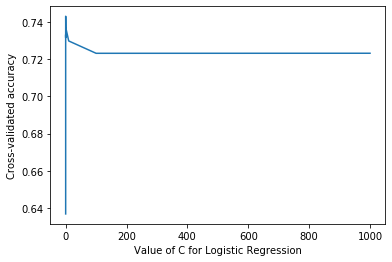

In [10]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(C_scores))
print('Max of list', max(C_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(C_list, C_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-validated accuracy')